# 회귀분석 (Regression)
- 데이터를 이용하여 함수식(Y=aX+b)를 구한다.
- 기울기(DL:Weight) 와 절편(DL:Bias) 을 DataSet으로 최적값을 구한다 (정답과 오차율의 차이가 제일 적은 것으로 선택 --> 인공신경망으로 발전 )
- 기울기와 절편으로 Y값을 예측할 수 있다.

### 단순회귀 분석 : Y=aX+b (x는 feature y는 target)


In [1]:
regression <- read.csv("../Data//regression.csv")

In [2]:
head(regression)
tail(regression)
str(regression)

age,Height,Weight
0~3Months,59.1,5.9
3~6Months,66.7,8.0
6~9Months,71.4,8.9
9~12Months,75.0,10.1
12~18Months,80.1,10.9
2Year,87.8,13.2


,age,Height,Weight
26,30~34Year,171.3,71.5
27,35~39Year,170.7,72.3
28,40~49Year,168.6,70.6
29,50~59Year,166.1,69.1
30,60~69Year,164.4,65.9
31,70YearOver,162.4,61.1


'data.frame':	31 obs. of  3 variables:
 $ age   : Factor w/ 31 levels "0~3Months","10Year",..: 1 16 24 30 4 15 19 21 23 26 ...
 $ Height: num  59.1 66.7 71.4 75 80.1 ...
 $ Weight: num  5.9 8 8.9 10.1 10.9 13.2 14.8 16.7 19.1 21.5 ...


In [3]:
# 기본 통계량 확인
summary(regression)

          age         Height          Weight     
 0~3Months  : 1   Min.   : 59.1   Min.   : 5.90  
 10Year     : 1   1st Qu.:105.7   1st Qu.:17.90  
 11Year     : 1   Median :150.7   Median :45.20  
 12~18Months: 1   Mean   :135.8   Mean   :42.62  
 12Year     : 1   3rd Qu.:169.8   3rd Qu.:66.65  
 13Year     : 1   Max.   :173.8   Max.   :72.30  
 (Other)    :25                                  

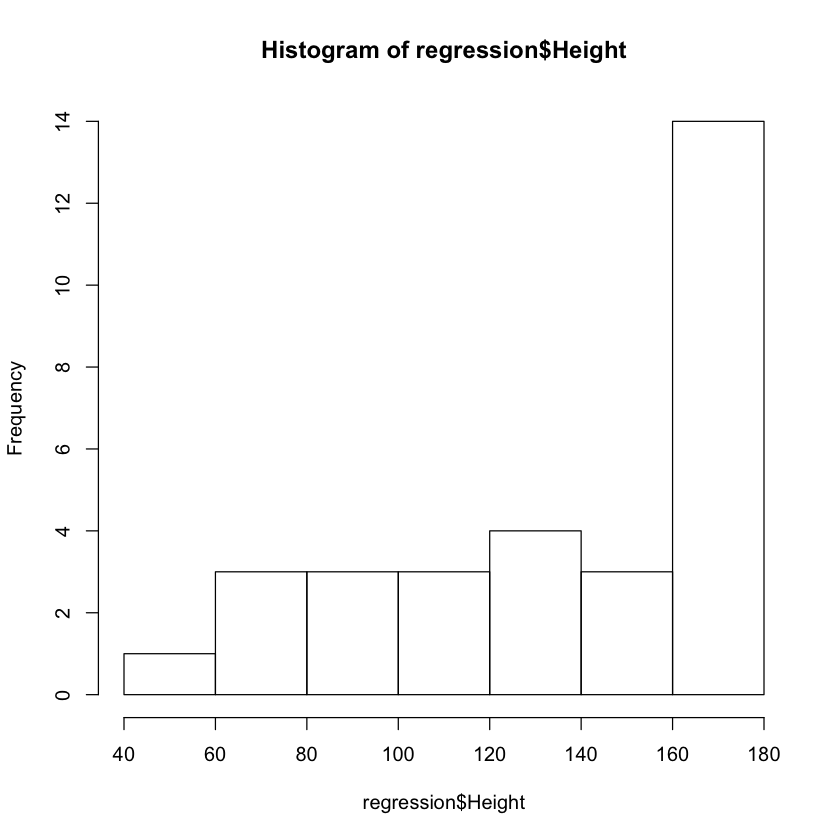

In [4]:
hist(regression$Height)

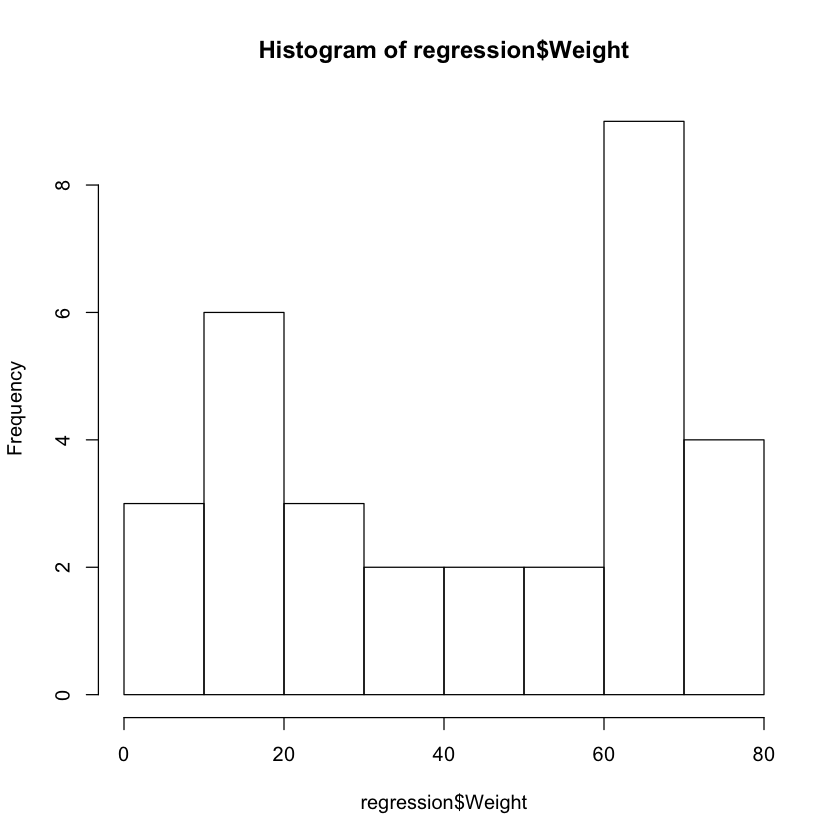

In [5]:
hist(regression$Weight)

In [6]:
cor(regression$Height,regression$Weight)

[1] 0.9672103

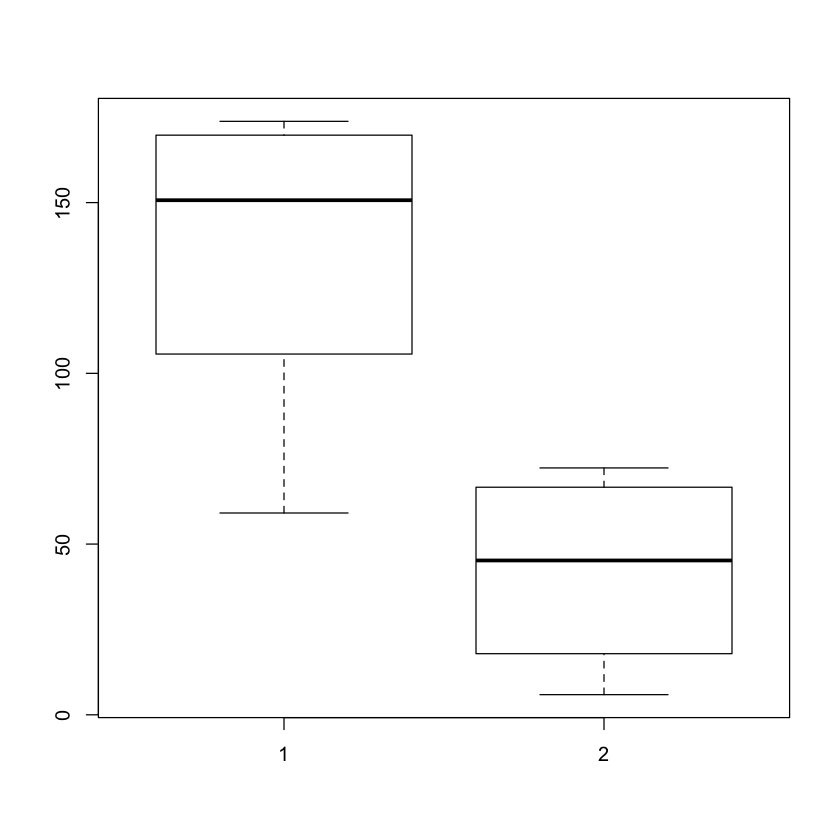

In [7]:
boxplot(regression$Height,regression$Weight)

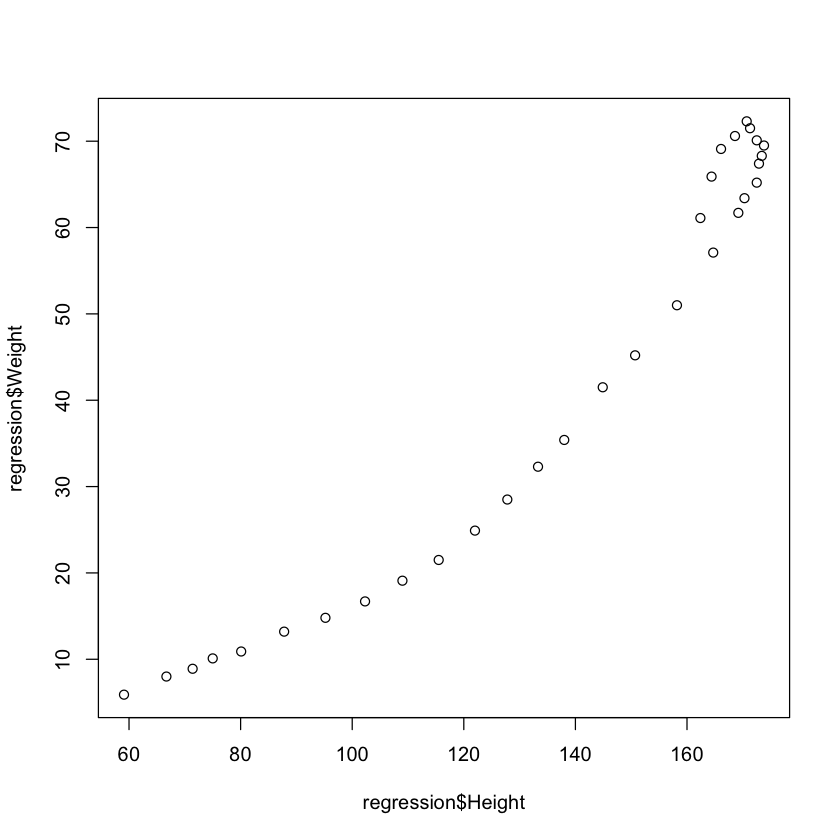

In [8]:
plot(regression$Height,regression$Weight)

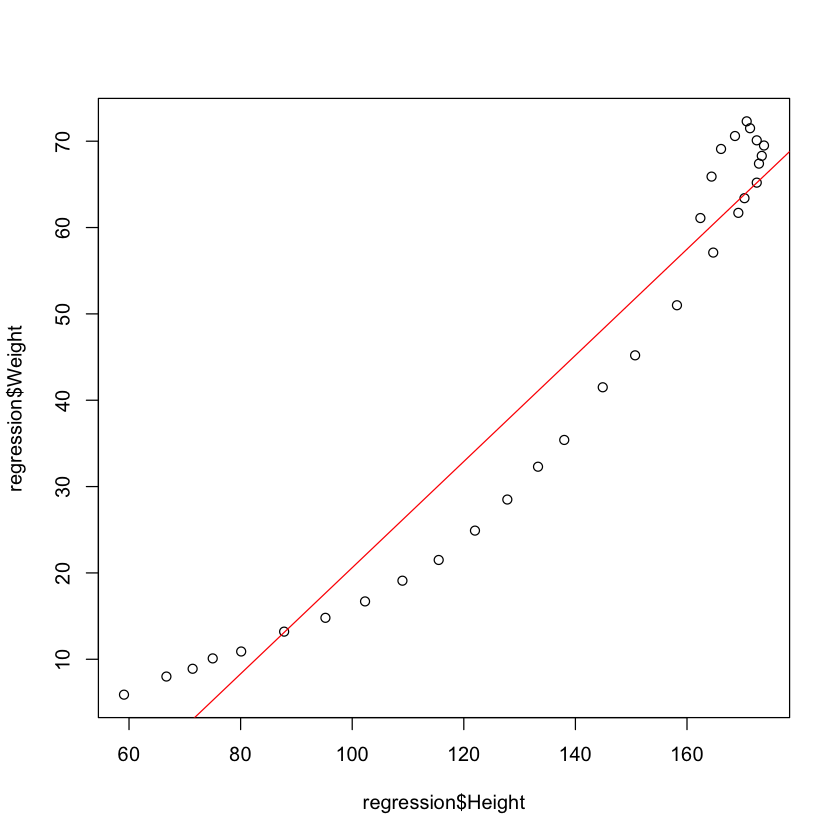

In [9]:
# 데이터 분포된것을 가지고 y=ax+b 라는 공식을 만들려고 함 (선형식)
plot(regression$Weight~regression$Height)

#회귀선 (중앙선, 평균선)
r<- lm(regression$Weight~regression$Height)  #최적의 공식을 가지고 선을 그려주는 것 (종속변수~ 독립변수)
abline(r,col="Red")

In [10]:
# 분석결과

summary(r)


Call:
lm(formula = regression$Weight ~ regression$Height)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.2327 -5.9811  0.0915  5.3125 10.4346 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -40.86594    4.22768  -9.666 1.42e-10 ***
regression$Height   0.61474    0.02998  20.508  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.355 on 29 degrees of freedom
Multiple R-squared:  0.9355,	Adjusted R-squared:  0.9333 
F-statistic: 420.6 on 1 and 29 DF,  p-value: < 2.2e-16


 p-value: < 2.2e-16 <0.05 <br>
Adjusted R-squared:  0.9333 <- 예측력 (93%의 정확도가 있다) <br>
Residual standard error: 6.355 <- 표준오차  <br>
***가 중요도를 의미함

In [11]:
# 회귀식 
r


Call:
lm(formula = regression$Weight ~ regression$Height)

Coefficients:
      (Intercept)  regression$Height  
         -40.8659             0.6147  


In [12]:
# 키가 170인 사람의 몸무게는 ?
 0.6147*170-40.8659

# 표준오차 적용하기
cat(0.6147*170- 40.8659-6.355 ,"~",

0.6147*170-40.8659+6.355)

[1] 63.6331

57.2781 ~ 69.9881

---
### IQ

In [13]:
iq <- read.csv("../Data//IQ.csv")
head(iq)
tail(iq)
str(iq)

이름,성적,IQ,다니는.학원수,게임하는.시간,TV시청.시간
A,90,140,2,1,0
B,75,125,1,3,3
C,77,120,1,0,4
D,83,135,2,3,2
E,65,105,0,4,4
F,80,123,3,1,1


,이름,성적,IQ,다니는.학원수,게임하는.시간,TV시청.시간
5,E,65,105,0,4,4
6,F,80,123,3,1,1
7,G,83,132,3,4,1
8,H,70,115,1,1,3
9,I,87,128,4,0,0
10,J,79,131,2,2,3


'data.frame':	10 obs. of  6 variables:
 $ 이름         : Factor w/ 10 levels "A","B","C","D",..: 1 2 3 4 5 6 7 8 9 10
 $ 성적         : int  90 75 77 83 65 80 83 70 87 79
 $ IQ           : int  140 125 120 135 105 123 132 115 128 131
 $ 다니는.학원수: int  2 1 1 2 0 3 3 1 4 2
 $ 게임하는.시간: int  1 3 0 3 4 1 4 1 0 2
 $ TV시청.시간  : int  0 3 4 2 4 1 1 3 0 3


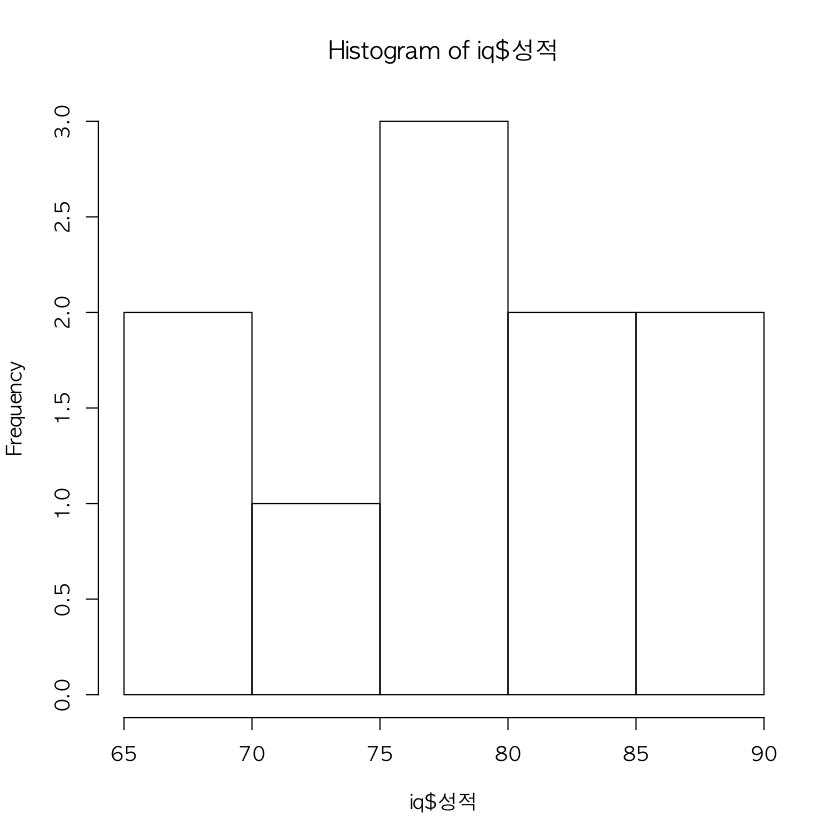

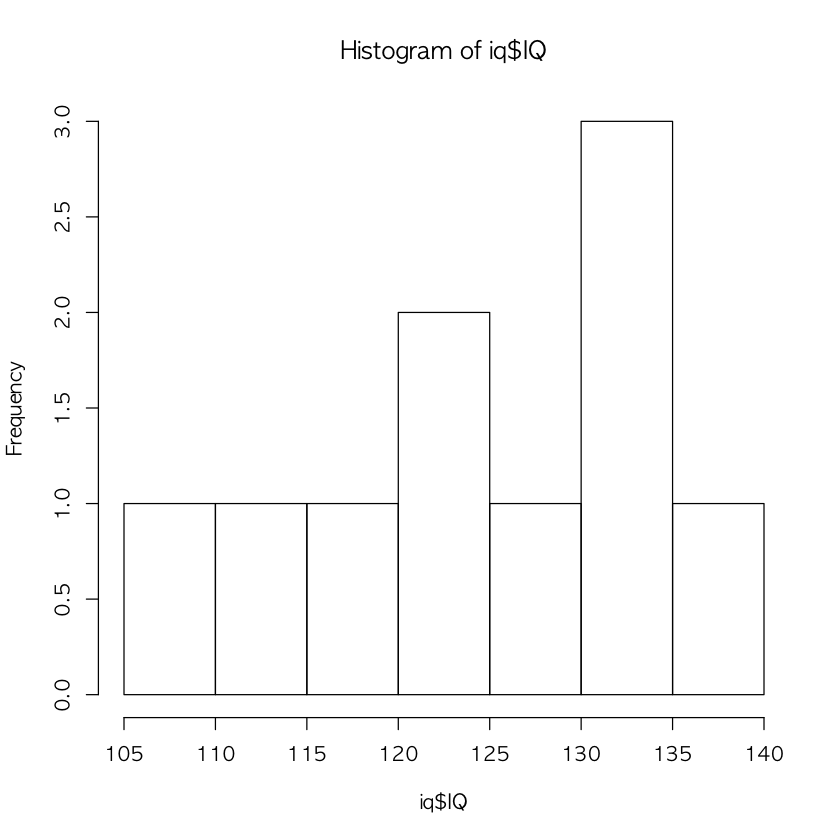

In [14]:
# IQ가 126인 사람의 성적을 예측해 보시오
options(warn = -1)
par(family = "AppleGothic")
hist(iq$성적)
hist(iq$IQ)

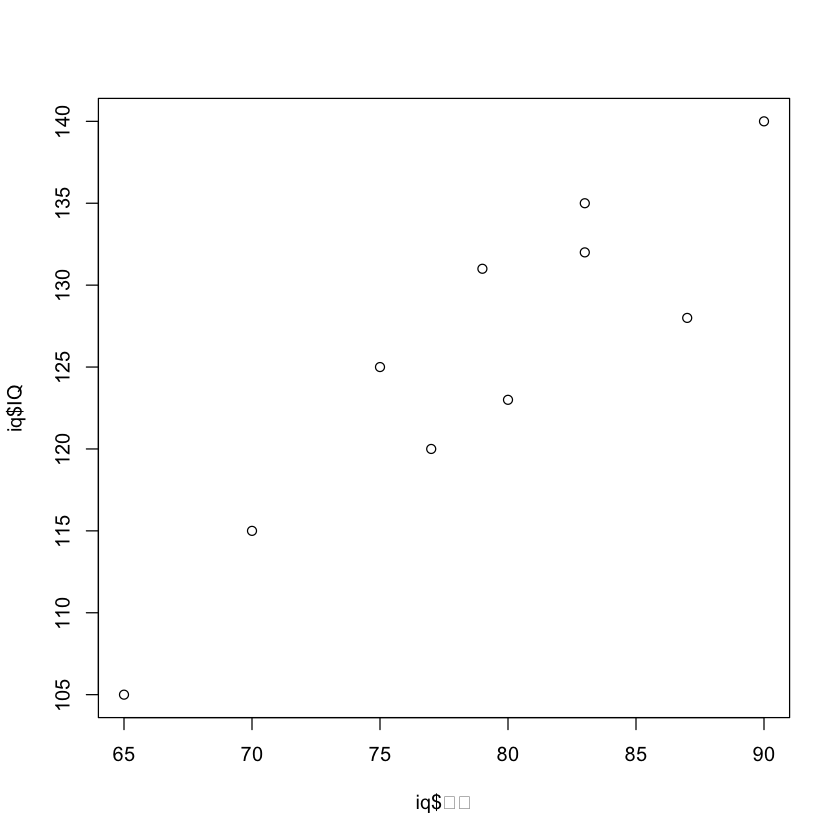

In [15]:
plot(iq$성적,iq$IQ)

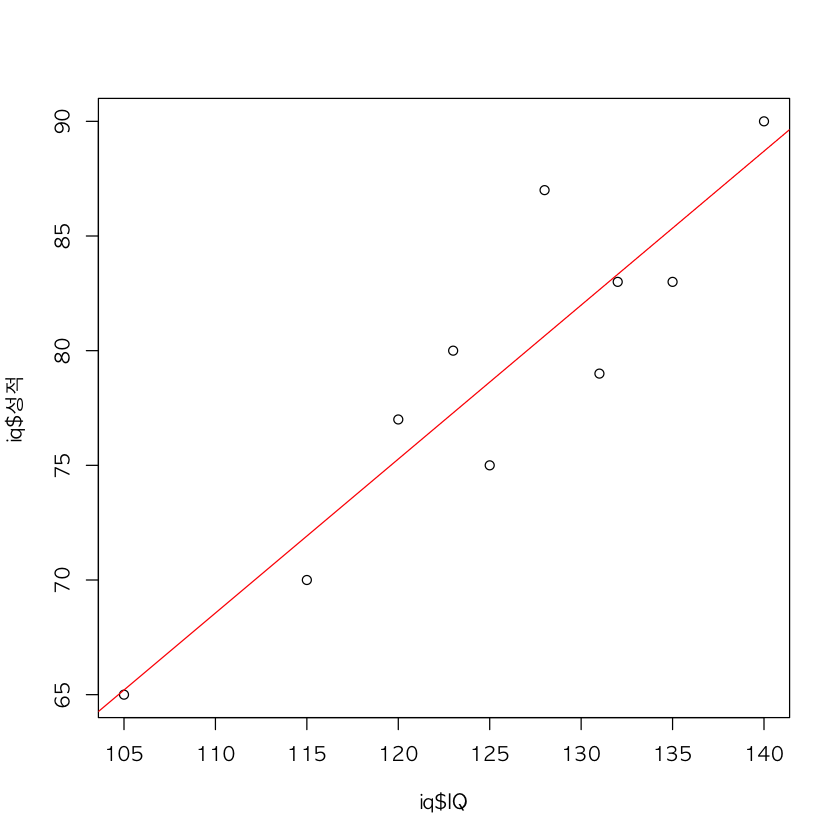

In [16]:
options(warn = -1)
par(family = "AppleGothic")
# 데이터 분포된것을 가지고 y=ax+b 라는 공식을 만들려고 함 (선형식)
plot(iq$성적~iq$IQ)

#회귀선 (중앙선, 평균선)
r<- lm(iq$성적~iq$IQ)  #최적의 공식을 가지고 선을 그려주는 것 (종속변수~ 독립변수)
abline(r,col="Red")

In [17]:
# 분석 결과
summary(r)


Call:
lm(formula = iq$성적 ~ iq$IQ)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6598 -2.2384 -0.2674  1.6186  6.3544 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -5.2918    13.5832  -0.390 0.707007    
iq$IQ         0.6714     0.1080   6.217 0.000255 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.322 on 8 degrees of freedom
Multiple R-squared:  0.8285,	Adjusted R-squared:  0.8071 
F-statistic: 38.65 on 1 and 8 DF,  p-value: 0.0002547


In [18]:
# 회귀식 
r


Call:
lm(formula = iq$성적 ~ iq$IQ)

Coefficients:
(Intercept)        iq$IQ  
    -5.2918       0.6714  


In [19]:
#IQ 126 인 사람의 성적 예측

cat(0.6714*126-3.322,"~",0.6714*126+3.322)

81.2744 ~ 87.9184

In [20]:
cor(iq$성적,iq$IQ)

cor(iq$성적,iq$다니는.학원수)
cor(iq$성적,iq$게임하는.시간)
cor(iq$성적,iq$TV시청.시간)

[1] 0.9102242

[1] 0.7840514

[1] -0.3383549

[1] -0.8473333

In [21]:
cor(iq[,-1])

,성적,IQ,다니는.학원수,게임하는.시간,TV시청.시간
성적,1.0000000,0.9102242,0.7840514,-0.3383549,-0.8473333
IQ,0.9102242,1.0000000,0.6009466,-0.1038108,-0.6783251
다니는.학원수,0.7840514,0.6009466,1.0000000,-0.3106005,-0.8465387
게임하는.시간,-0.3383549,-0.1038108,-0.3106005,1.0000000,0.2440191
TV시청.시간,-0.8473333,-0.6783251,-0.8465387,0.2440191,1.0000000


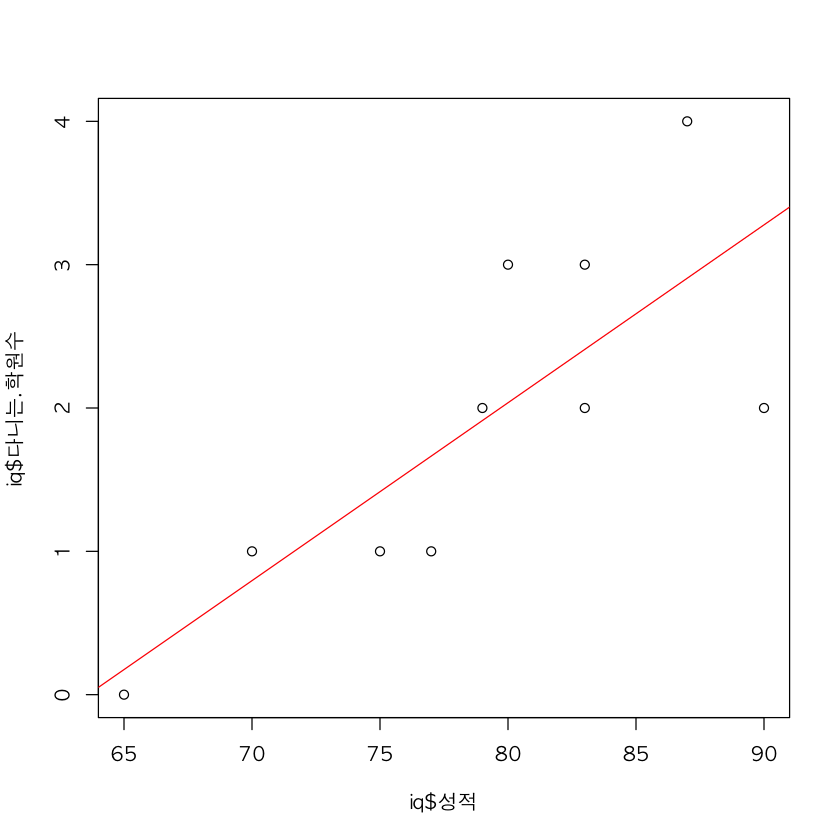

In [22]:
# 학원을 몇군데 다녀야 성적이 90점 이상이 될까?


options(warn = -1)
par(family = "AppleGothic")
# 데이터 분포된것을 가지고 y=ax+b 라는 공식을 만들려고 함 (선형식)
plot(iq$다니는.학원수~iq$성적)

#회귀선 (중앙선, 평균선)
a<- lm(iq$다니는.학원수~iq$성적)  #최적의 공식을 가지고 선을 그려주는 것 (종속변수~ 독립변수)
abline(a,col="Red")

In [23]:
a


Call:
lm(formula = iq$다니는.학원수 ~ iq$성적)

Coefficients:
(Intercept)      iq$성적  
    -7.8916       0.1241  


In [24]:
summary(a)


Call:
lm(formula = iq$다니는.학원수 ~ iq$성적)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2775 -0.4142 -0.0437  0.4945  1.0948 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) -7.89163    2.75190  -2.868  0.02090 * 
iq$성적      0.12410    0.03473   3.573  0.00726 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7882 on 8 degrees of freedom
Multiple R-squared:  0.6147,	Adjusted R-squared:  0.5666 
F-statistic: 12.77 on 1 and 8 DF,  p-value: 0.007264


In [25]:
0.12410 *90+ (-7.89163) -0.7882 
0.12410 *90+ (-7.89163)+0.7882 

[1] 2.48917

[1] 4.06557

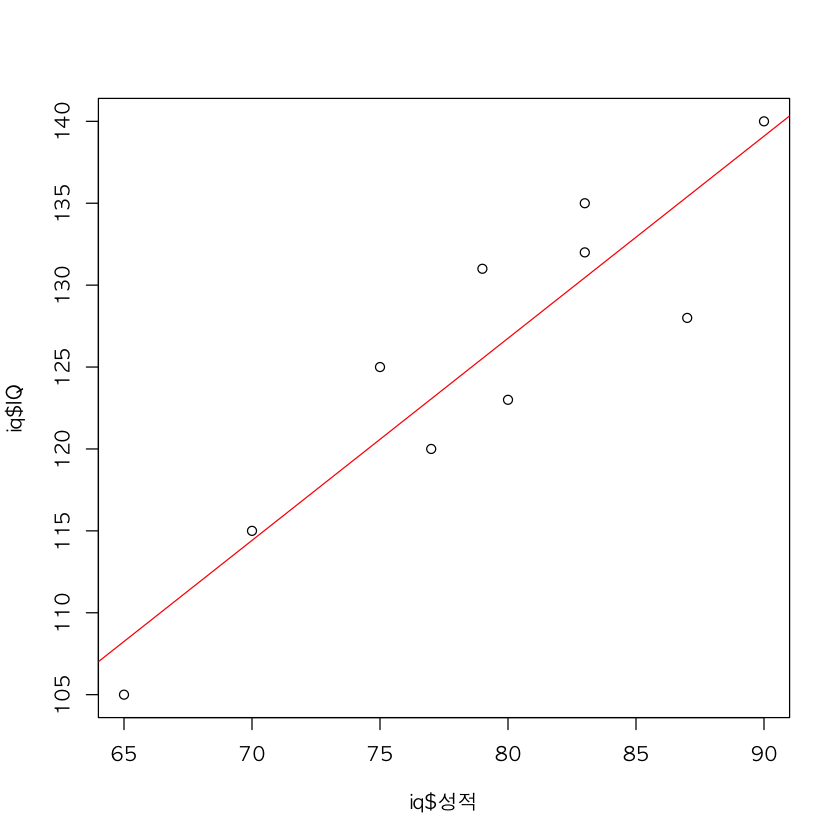

In [26]:
# 성적이 85 점이라면 iq는 얼마??
options(warn = -1)
par(family = "AppleGothic")
# 데이터 분포된것을 가지고 y=ax+b 라는 공식을 만들려고 함 (선형식)
plot(iq$IQ~iq$성적)

#회귀선 (중앙선, 평균선)
a<- lm(iq$IQ~iq$성적)  #최적의 공식을 가지고 선을 그려주는 것 (종속변수~ 독립변수)
abline(a,col="Red")

In [27]:
a


Call:
lm(formula = iq$IQ ~ iq$성적)

Coefficients:
(Intercept)      iq$성적  
     28.035        1.234  


In [28]:
summary(a)


Call:
lm(formula = iq$IQ ~ iq$성적)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3956 -3.1991  0.7426  3.6946  5.4766 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  28.0353    15.7260   1.783 0.112480    
iq$성적       1.2340     0.1985   6.217 0.000255 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.504 on 8 degrees of freedom
Multiple R-squared:  0.8285,	Adjusted R-squared:  0.8071 
F-statistic: 38.65 on 1 and 8 DF,  p-value: 0.0002547


In [29]:
cat(1.2340 *85+28.0353-4.504,"~",1.2340 *85+28.0353+4.504,"\t")
cat(1.2340 *85-4.504,"~",1.2340 *85+4.504)

128.4213 ~ 137.4293 	100.386 ~ 109.394

---
## 다중 회귀 분석
- 여러개의 항목들로 구성된 식으로 예측하는 방법

### attitude
- 대형 금융기관의 사무직 대상으로 진급의 요소에 대한 설문조사 30개 부서 (무작위) 약 35명을 대상으로 한 설문지 데이터 
- 각 수치는 각 부서의 7개 질문에 대한 점수를 나타낸다 


In [30]:
help(attitude)

In [31]:
head(attitude)

rating,complaints,privileges,learning,raises,critical,advance
43,51,30,39,61,92,45
63,64,51,54,63,73,47
71,70,68,69,76,86,48
61,63,45,47,54,84,35
81,78,56,66,71,83,47
43,55,49,44,54,49,34


In [32]:
str(attitude)

'data.frame':	30 obs. of  7 variables:
 $ rating    : num  43 63 71 61 81 43 58 71 72 67 ...
 $ complaints: num  51 64 70 63 78 55 67 75 82 61 ...
 $ privileges: num  30 51 68 45 56 49 42 50 72 45 ...
 $ learning  : num  39 54 69 47 66 44 56 55 67 47 ...
 $ raises    : num  61 63 76 54 71 54 66 70 71 62 ...
 $ critical  : num  92 73 86 84 83 49 68 66 83 80 ...
 $ advance   : num  45 47 48 35 47 34 35 41 31 41 ...


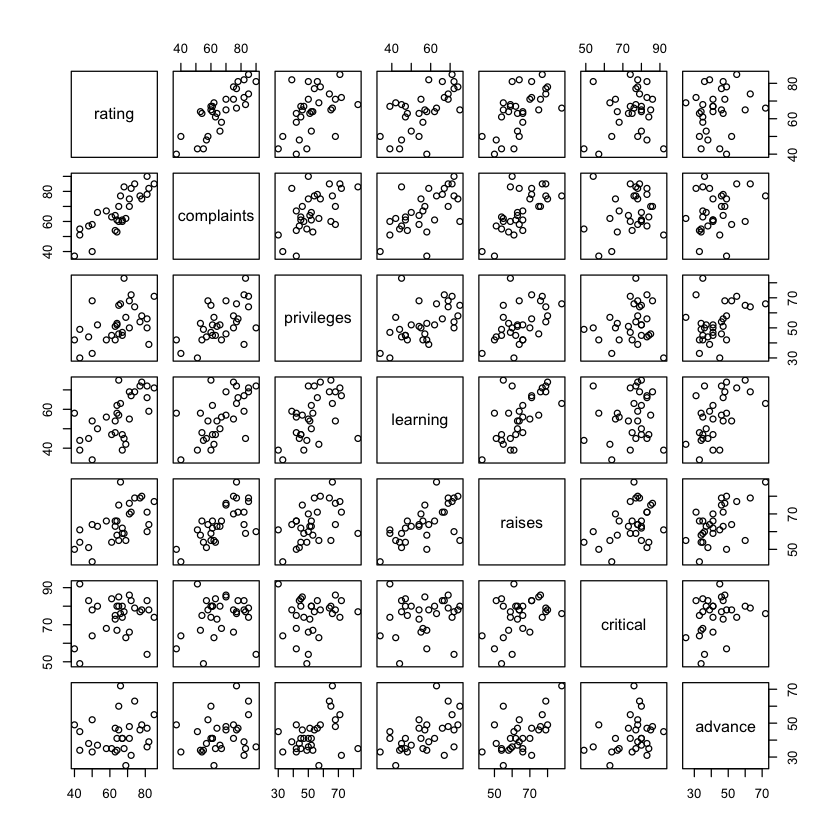

In [33]:
plot(attitude)

In [34]:
# 회귀분석
model <-lm(rating ~ ., data=attitude) #.은 앞에 있는 데이터 빼고 전부다라는 의미
model


Call:
lm(formula = rating ~ ., data = attitude)

Coefficients:
(Intercept)   complaints   privileges     learning       raises     critical  
   10.78708      0.61319     -0.07305      0.32033      0.08173      0.03838  
    advance  
   -0.21706  


rating = 0.61319 * complaints+-0.07305 * privileges+.....+ 10.78708

In [35]:
# model 검토
summary(model)


Call:
lm(formula = rating ~ ., data = attitude)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.9418  -4.3555   0.3158   5.5425  11.5990 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.78708   11.58926   0.931 0.361634    
complaints   0.61319    0.16098   3.809 0.000903 ***
privileges  -0.07305    0.13572  -0.538 0.595594    
learning     0.32033    0.16852   1.901 0.069925 .  
raises       0.08173    0.22148   0.369 0.715480    
critical     0.03838    0.14700   0.261 0.796334    
advance     -0.21706    0.17821  -1.218 0.235577    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.068 on 23 degrees of freedom
Multiple R-squared:  0.7326,	Adjusted R-squared:  0.6628 
F-statistic:  10.5 on 6 and 23 DF,  p-value: 1.24e-05


> Adjusted R-squared:  0.6628 

complaints와learning 빼고는 별 관계가 없음을 알수 있다

In [36]:
cor(attitude)

,rating,complaints,privileges,learning,raises,critical,advance
rating,1.0000000,0.8254176,0.4261169,0.6236782,0.5901390,0.1564392,0.1550863
complaints,0.8254176,1.0000000,0.5582882,0.5967358,0.6691975,0.1877143,0.2245796
privileges,0.4261169,0.5582882,1.0000000,0.4933310,0.4454779,0.1472331,0.3432934
learning,0.6236782,0.5967358,0.4933310,1.0000000,0.6403144,0.1159652,0.5316198
raises,0.5901390,0.6691975,0.4454779,0.6403144,1.0000000,0.3768830,0.5741862
critical,0.1564392,0.1877143,0.1472331,0.1159652,0.3768830,1.0000000,0.2833432
advance,0.1550863,0.2245796,0.3432934,0.5316198,0.5741862,0.2833432,1.0000000


In [37]:
# 예측력을 높이기 위해 상대적으로 기여도가 낮은 변수를 제거

reduced <- step(model, direction = "backward") 

Start:  AIC=123.36
rating ~ complaints + privileges + learning + raises + critical + 
    advance

             Df Sum of Sq    RSS    AIC
- critical    1      3.41 1152.4 121.45
- raises      1      6.80 1155.8 121.54
- privileges  1     14.47 1163.5 121.74
- advance     1     74.11 1223.1 123.24
<none>                    1149.0 123.36
- learning    1    180.50 1329.5 125.74
- complaints  1    724.80 1873.8 136.04

Step:  AIC=121.45
rating ~ complaints + privileges + learning + raises + advance

             Df Sum of Sq    RSS    AIC
- raises      1     10.61 1163.0 119.73
- privileges  1     14.16 1166.6 119.82
- advance     1     71.27 1223.7 121.25
<none>                    1152.4 121.45
- learning    1    177.74 1330.1 123.75
- complaints  1    724.70 1877.1 134.09

Step:  AIC=119.73
rating ~ complaints + privileges + learning + advance

             Df Sum of Sq    RSS    AIC
- privileges  1     16.10 1179.1 118.14
- advance     1     61.60 1224.6 119.28
<none>                  

In [38]:
summary(reduced)


Call:
lm(formula = rating ~ complaints + learning, data = attitude)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.5568  -5.7331   0.6701   6.5341  10.3610 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.8709     7.0612   1.398    0.174    
complaints    0.6435     0.1185   5.432 9.57e-06 ***
learning      0.2112     0.1344   1.571    0.128    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.817 on 27 degrees of freedom
Multiple R-squared:  0.708,	Adjusted R-squared:  0.6864 
F-statistic: 32.74 on 2 and 27 DF,  p-value: 6.058e-08


> Adjusted R-squared:  0.6864 예측력이 높아짐

---
# iris에 대한 다중 회귀분석

In [39]:
# 회귀분석
model <-lm(as.numeric(Species) ~ ., data=iris) #.은 앞에 있는 데이터 빼고 전부다라는 의미
str(model)

List of 12
 $ coefficients : Named num [1:5] 1.1865 -0.1119 -0.0401 0.2286 0.6093
  ..- attr(*, "names")= chr [1:5] "(Intercept)" "Sepal.Length" "Sepal.Width" "Petal.Length" ...
 $ residuals    : Named num [1:150] 0.0825 0.0401 0.0486 -0.0123 0.0754 ...
  ..- attr(*, "names")= chr [1:150] "1" "2" "3" "4" ...
 $ effects      : Named num [1:150] -24.49 7.83 3.37 -4.29 1.41 ...
  ..- attr(*, "names")= chr [1:150] "(Intercept)" "Sepal.Length" "Sepal.Width" "Petal.Length" ...
 $ rank         : int 5
 $ fitted.values: Named num [1:150] 0.917 0.96 0.951 1.012 0.925 ...
  ..- attr(*, "names")= chr [1:150] "1" "2" "3" "4" ...
 $ assign       : int [1:5] 0 1 2 3 4
 $ qr           :List of 5
  ..$ qr   : num [1:150, 1:5] -12.2474 0.0816 0.0816 0.0816 0.0816 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:150] "1" "2" "3" "4" ...
  .. .. ..$ : chr [1:5] "(Intercept)" "Sepal.Length" "Sepal.Width" "Petal.Length" ...
  .. ..- attr(*, "assign")= int [1:5] 0 1 2 3 4
  ..$ qraux: num [1:

In [40]:
summary(model)


Call:
lm(formula = as.numeric(Species) ~ ., data = iris)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.59215 -0.15368  0.01268  0.11089  0.55077 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.18650    0.20484   5.792 4.15e-08 ***
Sepal.Length -0.11191    0.05765  -1.941   0.0542 .  
Sepal.Width  -0.04008    0.05969  -0.671   0.5030    
Petal.Length  0.22865    0.05685   4.022 9.26e-05 ***
Petal.Width   0.60925    0.09446   6.450 1.56e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2191 on 145 degrees of freedom
Multiple R-squared:  0.9304,	Adjusted R-squared:  0.9285 
F-statistic: 484.5 on 4 and 145 DF,  p-value: < 2.2e-16


In [44]:
# 예측력을 높이기 위해 상대적으로 기여도가 낮은 변수를 제거

reduced <- step(model, direction = "backward") 

Start:  AIC=-450.56
as.numeric(Species) ~ Sepal.Length + Sepal.Width + Petal.Length + 
    Petal.Width

               Df Sum of Sq    RSS     AIC
- Sepal.Width   1   0.02164 6.9823 -452.09
<none>                      6.9606 -450.56
- Sepal.Length  1   0.18090 7.1415 -448.71
- Petal.Length  1   0.77649 7.7371 -436.69
- Petal.Width   1   1.99710 8.9577 -414.72

Step:  AIC=-452.09
as.numeric(Species) ~ Sepal.Length + Petal.Length + Petal.Width

               Df Sum of Sq    RSS     AIC
<none>                      6.9823 -452.09
- Sepal.Length  1   0.44324 7.4255 -444.86
- Petal.Length  1   1.51946 8.5017 -424.56
- Petal.Width   1   2.11632 9.0986 -414.38


In [45]:
summary(reduced)


Call:
lm(formula = as.numeric(Species) ~ Sepal.Length + Petal.Length + 
    Petal.Width, data = iris)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.60753 -0.16188  0.01367  0.11217  0.54740 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.14469    0.19478   5.877 2.72e-08 ***
Sepal.Length -0.13624    0.04475  -3.044  0.00277 ** 
Petal.Length  0.25213    0.04473   5.637 8.67e-08 ***
Petal.Width   0.58689    0.08822   6.652 5.41e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2187 on 146 degrees of freedom
Multiple R-squared:  0.9302,	Adjusted R-squared:  0.9287 
F-statistic: 648.3 on 3 and 146 DF,  p-value: < 2.2e-16
